<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from fastai.tabular.all import *

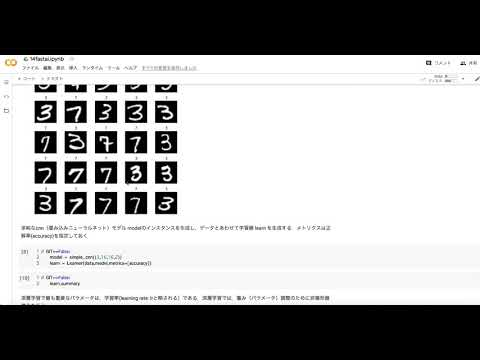

In [ ]:
#|echo: false
from IPython.display import Image, YouTubeVideo

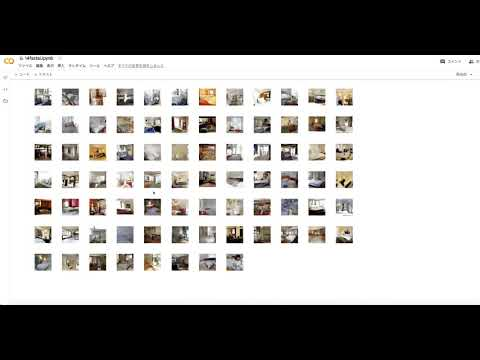

In [ ]:
#|echo: false

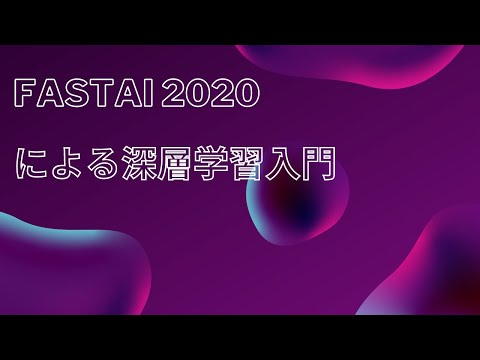

In [ ]:
#|echo: false

## 深層学習とは

深層学習とは多くの隠れ層（後で説明する）をもつニューラルネットである． ニューラルネットとは（機械学習のところで簡単に触れたように），

1. 訓練データを複数の階層から構成されるモデルに入力，
2. 上層からの重み付き和（線形変換）に活性化関数を適用して，下層に流す，
3. 最下層では損出関数によって誤差を評価，
4. 誤差の情報から勾配を計算，
5. 勾配の情報を用いて，重み（パラメータ）の更新，

を繰り返すだけである．これは単に，入力を出力に変換する関数とも考えられるが，
できるだけ与えられたデータに適合するように近似することを目標としている点が特徴である．

1ニューロンのニューラルネットは単なる古典的な線形回帰（もしくは分類問題の場合にはロジスティック回帰）である．

以下で用いる用語を整理しておこう．

- 人工知能: 機械に知能を持たせるための技術．
- 機械学習：（教師ありに限定だが）入力データと出力データから，モデルのパラメータを調整する方法．
- ニューラルネット：単なる関数近似器．
- 深層学習：単なる多次元分散型関数近似器．
- fastai：PyTorchのラッパー

## 深層学習の歴史

いま流行の深層学習(deep learning)はニューラルネットから生まれ，そのニューラルネットはパーセプトロンから生まれた．起源であるパーセプトロンまで遡ろう．

1958年に，コーネル大学の心理学者であったFrank Rosenblattがパーセプトロンの概念を提案した．これは1層からなるニューラルネットであり，極めて単純な構成をもつが，当時は部屋いっぱいのパンチカード式の計算機が必要であった．

隠れ層のない2層のニューラルネットでの出力誤差からの確率的勾配降下法は1960年にB. Widrow と M.E. Hoff, Jr. らが Widrow-Hoff 法（デルタルール）という名称で発表した．
隠れ層のある3層以上のニューラルネットは、1967年に甘利俊一が発表した．

1969年に，MITのMarvin Minsky（人工知能の巨人として知られる）が，ニューラルネットの限界についての論文を発表した．彼の名声による影響のためか，その後ニューラルネットの研究は徐々に下火になっていく．

2006年に，トロント大学のGeoffrey Hinton（ニューラルネットの父として知られる）は，多階層のニューラルネットでも効率よく学習できるような方法に関する論文を発表する．
この手法はオートエンコーダーと呼ばれ，その後の深層学習の爆発的な研究のもとになったものである．

2011年にマイクロソフト社は，言語認識のためにニューラルネットを使うようになる．その後も言語認識や機械翻訳は，画像認識ととともに，深層学習の応用分野として定着している．

2012年の7月にGoogle社は猫を認識するためのニューラルネットであるGoogle Brainを開始し，8月には言語認識に用いるようになる．同年の10月には，Hintonの2人の学生が，ImageNetコンテストで断トツの成績で1位になる．これをきっかけに，深層学習が様々な応用に使われるようになる．

2015年の12月には，マイクロソフト社のチームが，ImageNetコンテストで人間を超える結果を出し，2016年3月には，AlphaGoが碁の世界チャンピオンでLee Sedolを打ち負かす（ただしこれは深層学習というより強化学習の成果とも言える）．

最近では，拡散モデル(diffusion model)を用いた高精度の画像の生成や，
ChatGPT(Generative Pre-trained Transformer)に代表される自己アテンション(self attention)を用いた自然言語処理への応用が進み，技術の民主化が進んでいる．

## なぜ深層学習がうまくいくようになったのか？

データ量の増大に伴い，それをうまく利用できる手法である深層学習が有効になってきている．層の数を増やしても大丈夫なようなアーキテクチャ（モデル）が開発されたことも，重要な要因である．つまり，データと新しいモデルが両輪となって，様々な分野への応用を後押ししているのである．小さなデータしかないときには，ニューラルネットは線形回帰やサポートベクトル機械(SVM)と同じ程度の性能である．しかし，データが大規模になると，ニューラルネットはSVMより高性能になり，小規模なニューラルネットより大規模なニューラルネットの方が良い性能を出すようになる．

さらには，GPUの低価格化によって単純な計算の反復が必要な深層学習が高速に実行できるようになったことも普及を後押ししている．深層学習がうまく動くことが知られるにつれて，研究も加速している．古典的なシグモイド関数からReLU（ならびにその亜種）への移行，ドロップアウト，バッチ正規化など，実際にうまく動くアルゴリズムの開発も重要な要因である．さらに，応用に応じた様々なモデル（アーキテクチャ）が提案され，問題に応じて適切なモデルを使い分けることができるようになってきたのも，理由の1つである．

多くの人材が深層学習の分野に参入したことも重要な要因であるように感じている．ハイパーパラメータの適正化は，最適化における実験的解析と同様に，膨大な系統的な実験と，それを解析するマンパワーが必要となる．データを公開し，開発したソフトウェアをオープンソースにして配布するといったこの分野の風土も研究を加速している．

データやソフトウェアを非公開にする風土をもつ他の研究分野は，深層学習をお手本にする必要があるだろう．特に，日本の企業との共同研究では，データや開発したソフトウェアは非公開にしがちである．深層学習を牽引するコミュニティーのパワーは，そういった秘密主義がないことに起因している．

## fastaiとは

深層学習のためのパッケージとしては， tensorflow (+Keras), PyTorchなどが有名であるが，ここではfastai https://www.fast.ai を用いる．

fastaiは、最先端の深層学習を実務家が気軽に適用できるようにするためのパッケージである．

開発者が「AIをもう一度uncoolに」を標語にしているように，専門家でなくても（Pythonを知っていれば）ある程度（というか数年前の世界新記録程度）の深層学習を使うことができる．

特徴は以下の通り。

- コードが短くかける（Kerasよりも短い）．
- 速い．
- 最新の工夫が取り入れられている．
- PyTorchの足りない部分を補完してくれる．
- 無料の（広告なしの）講義ビデオがある．
- テキストのソースも無料公開されている． https://github.com/fastai/fastbook

<!-- fastaiの無料講義については，https://www.fast.ai/ 内のPractical Deep Learning for Coders 参照．　

本のgithubリポ
https://github.com/fastai/fastbook/

ドキュメント（マニュアル）
https://docs.fast.ai/

日本語の解説ビデオ -->

## fastaiのインストール

自分のマシンへのfastaiのインストールは本家サイトを参照されたい．

Google Colab上にはすでにインストールされているので，以下の操作だけを行えば良い．

- 上部メニューのランタイム/ランタイプの種類を変更でGPUをオンにする．

割り当てられたGPUを，以下のコマンドで確認しておく．

In [ ]:
!nvidia-smi

Tue Aug 23 01:10:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |   2084MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#hide
google driveにアクセスする権限を与える必要があるので，リンクを開いてauthentification codeをコピペする．

In [ ]:
#![ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

## MNIST_SAMPLE

深層学習における ”Hello World” は、MNISTの手書き文字認識である。ここでは、さらに簡単なMNISTの一部（$３$と$７$だけの画像）を認識するためのニューラルネットを作成する。
これは、2値分類問題と呼ばれ、似た例をあげると，与えられた写真に猫が写っているか否か，受け取ったメイルがスパムか否か，などを判定することがあげられる。
2値分類問題は、独立変数（ニューラルネットの入力，特徴ベクトル）に対する従属変数（ターゲット）が $0$か$1$の値をとる問題であると言える．

この簡単な例を用いて、fastaiを用いた訓練 (training) のコツを伝授する．

まず、fastaiで準備されているMNIST_SAMPLEのデータを読み込む．

pathはデータを展開するフォルダ（ディレクトリ）名であり、dlsはデータローダーと名付けられた画像用データローダー (ImageDataLoader)のインスタンスである。

データローダーには，様々なファクトリメソッド（インスタンスを生成するためのメソッド）がある．ここでは，フォルダから生成するfrom_folderメソッドを用いる．

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)
dls = ImageDataLoaders.from_folder(path)

doc()でドキュメントをみることができる． 

In [ ]:
doc(ImageDataLoaders)

読み込んだデータの1バッチ分は，データローダーのshow_batchメソッドでみることができる．

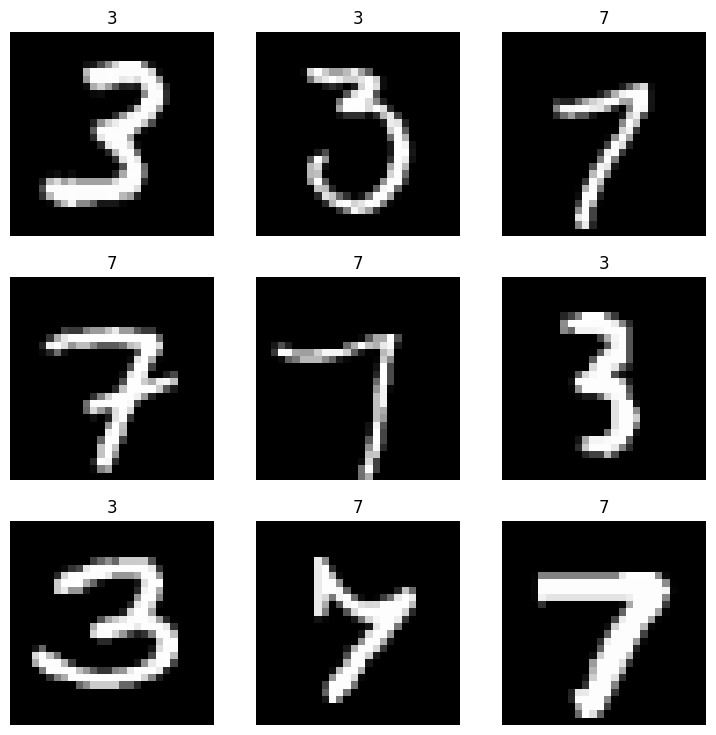

In [ ]:
dls.show_batch()

畳み込みニューラルネットモデルのインスタンスを生成し，データとあわせて学習器 learn を生成する．メトリクス（評価尺度）はerror_rateを指定しておく．

学習器はresnet34を用い，学習済みのデータを用いた転移学習を行う．

### ResNet 

ResNetは残差ブロックとよばれる層の固まりを，何層にも重ねたものである．残差ブロックでは，ブロックへの入力，線形層，ReLU(rectified linear unit; $\max (0,x)$)，線形層の流れに，入力そのものを加えたものに，ReLUを行うことによって出力を得る． 入力をそのまま最終の活性化関数の前に繋げることによって，必要のないブロックを跳ばして計算することができるようになり，これによって多層のニューラルネットで発生する勾配消失や勾配爆発を避けることが可能になる．
残差ブロックは，畳み込み層の間に「近道（ショートカット）」を入れたものに他ならない．この「近道」を入れることによって，最適化が楽になることが知られている．局所解が減少し，
滑らかな空間（ランドスケープ）での最適化になるのだ．

残差ネットワークの学習器learnを作成してからlearn.summaryをみると、その構造がわかる。
以下で用いるresnet34は34層の大規模な畳み込みニューラルネットである。実行すると、学習済みの重みが読み込まれ，この重みをもとに転移学習を行うことができる．

### 転移学習

通常の訓練においては，初期のパラメータ（重み）はランダムに設定される．しかし，ランダムな初期パラメータからの学習は，アーキテクチャが大規模になると膨大な時間がかかることがある．そこで，特定のアーキテクチャに対して，事前に訓練されたパラメータ（重み）を用いることが行われるようになってきた．これが転移学習 (transfer learning) である．

多層の畳み込みニューラルネットで発生を用いて画像の分類をするケースを考えよう．学習が進むにつれて，最初の方の層では線や角などの簡単な形状を抽出するようになり，層が深まるにつれて徐々に複雑な形状を学習するようになる．たとえば，猫のふわふわした毛に反応するニューロンや，猫の目に反応するニューロンが出てくる．最終層の直前では，分類したい物の特徴を抽出するニューロンがある．転移学習では，他の目的のために訓練されたパラメータを用い，判別を行う最終層だけに対して訓練（パラメータの調整）を行う．線や角の判別は共通であるが，最終的な分類は，対象とするものに依存して再訓練をしなければならないからだ．

最終層のパラメータが十分に訓練されたら，上層のパラメータに対しても訓練を行う方が良い．fine_tuneメソッドは，これを自動的にしてくれる．

### 学習率の調整

深層学習で最も重要なパラメータは，学習率(learning rate: lrと略される）である．深層学習では，重み（パラメータ）調整のために非線形最適化を行う．

つまり，勾配に適当なステップサイズを乗じて現在の値から減じる操作を繰り返す．この非線形最適化におけるステップサイズのことを，学習率と呼んでいる．

これをチューニングするために，fastaiでは学習器オブジェクトにlr_find() というメソッドを準備している．

評価尺度(metrics）に誤差率を指定した学習器learnを作成してlearn.lr_find()とする．

lr_findは，学習率を小さな値から1反復ごとに2倍にしたときの損出関数（目的関数のこと）をプロットしてくれる．
目安だが，最小値をもつ谷に入るあたりの学習率が良いと言われている．

/Users/mikiokubo/Library/Caches/pypoetry/virtualenvs/analytics2-0ZiTWol9-py3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mikiokubo/Library/Caches/pypoetry/virtualenvs/analytics2-0ZiTWol9-py3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/mikiokubo/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|███████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:02<00:00,

SuggestedLRs(valley=0.0020892962347716093)

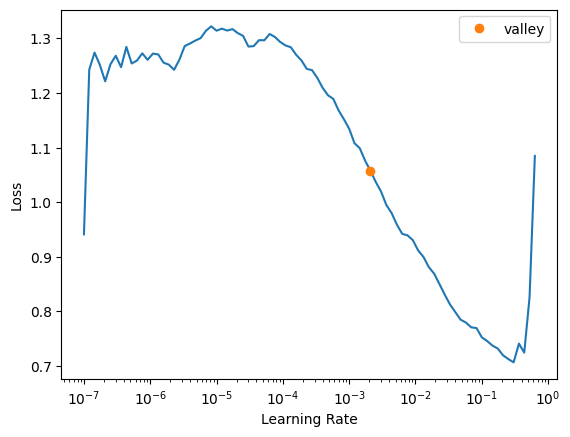

In [ ]:
learn = vision_learner(dls,resnet34, metrics=error_rate, cbs=ShowGraphCallback())
learn.lr_find()

損出関数が最小になるのは，学習率が0.2あたりだが，最も大きな谷の下り坂に入るあたりが良いとされている．ここでは，学習率を1e-2 (0.01)に設定して訓練してみる．

これには学習器インスタンスのfit_tuneメソッドを用いる．引数はエポック数（最適化の反復回数；データ全体を何回使うかを表す）と学習率である．

なお，実際の反復ごとの学習率は，学習器のcbs引数をShowGraphCallback()とすると，見ることができる．

In [ ]:
doc(learn.fine_tune)

Learner.fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, *, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False, start_epoch=0)
Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


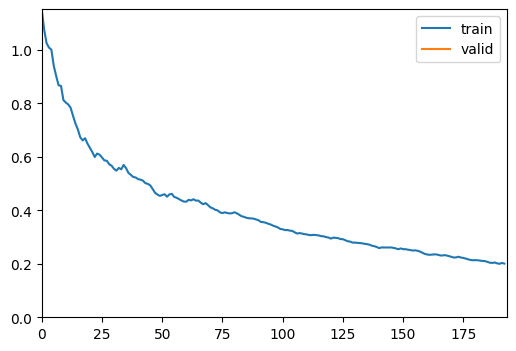

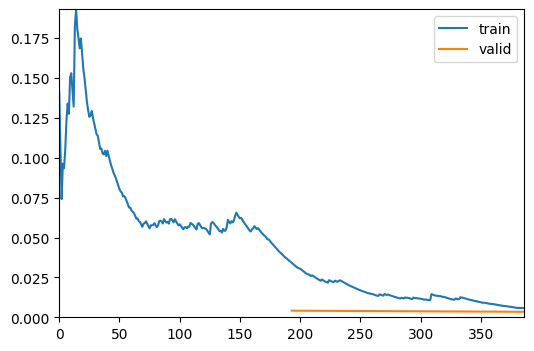

In [ ]:
learn.fine_tune(2, base_lr=0.01)

評価尺度の誤差率は非常に小さく、図から訓練はうまく行われているようだ。
結果を表示してみる。大体当たっているようだ。

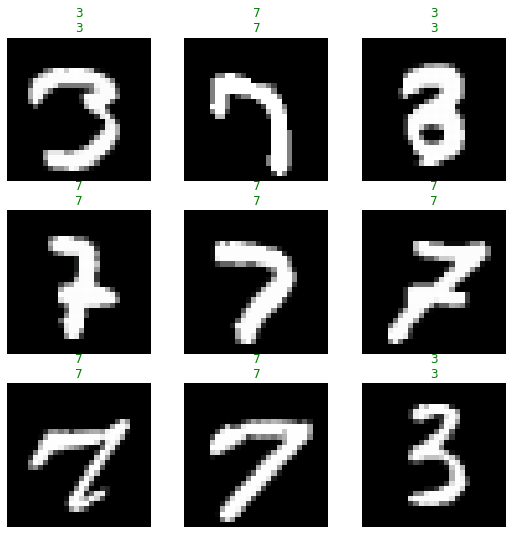

In [ ]:
learn.show_results()

fine_tuneでは、最終層以外を固定して（既定値では１回）訓練を行い、その後、fit_one_cycleを用いて、指定したエポック数だけ訓練する。
fit_one_cycleは，学習率を小さな値から最大学習率まで増やし，その後徐々に減少させていく．同時に，慣性項を徐々に下げて，その後増加させていく最適化法で，これを使うと収束が速くなると言われている．

fine_tuneメソッドの引数はエポック数と基本学習率 base_lr である．

分類モデルの結果を解釈は、ClassificationInterpretation()クラスのfrom_learnerメソッドを用いてできる。
plot_top_lossesを用いると，損出関数が悪かったデータを描画してくれる． 引数は画像数と画像のサイズである．

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

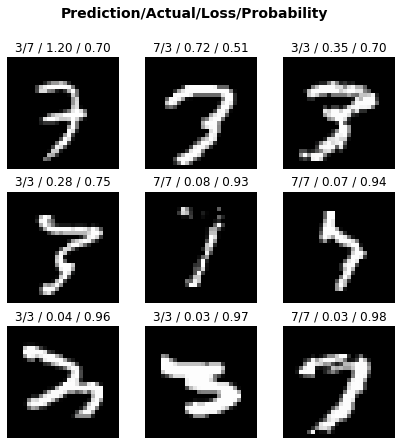

In [ ]:
interp.plot_top_losses(9, figsize=(7,7))

正解と外れを表す表（混同行列とよばれる）を出力するには，plot_confusion_matrixを使う．

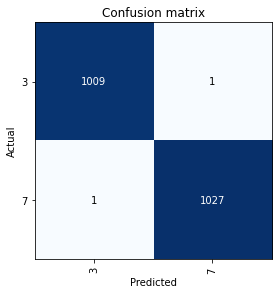

In [ ]:
interp.plot_confusion_matrix()

## Cifar10

Cifar10は粗い画像から，10種類の物体を当てるデータセットである．

ImageDataLoaderのfrom_forder()メソッドでデータローダーを生成する． 検証（テスト）データは10%に設定する．

<!-- データを読み込んだ後に，get_ransform()で **データ増大**(data augmentation)を行うためのオブジェクトtfms を生成する．
その際に引数df_tfmsにtfmsを渡して訓練時に画像を多少変えて行うように設定する．
最後に，データ束をnormalize()メソッドで正規化して表示する． -->

In [ ]:
path = untar_data(URLs.CIFAR)

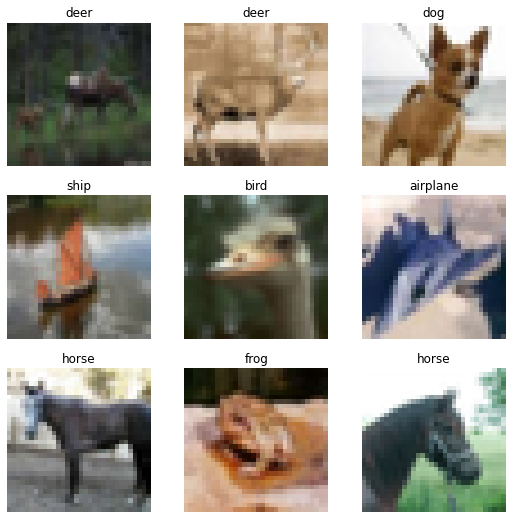

In [ ]:
dls = ImageDataLoaders.from_folder(path,valid_pct=0.1)
dls.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.001737800776027143)


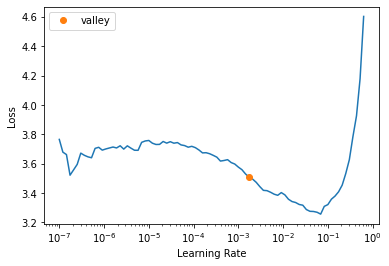

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])
lr= learn.lr_find() 
print(lr)

データとアーキテクチャ（モデル：RESNET）をあわせて学習器を生成する．

メトリクスは正解率(accuracy)とする．

In [ ]:
learn.fine_tune(10, base_lr=1e-3)

損出関数の大きい順に5つのデータを出力する．

In [ ]:
interp = Interpretation.from_learner(learn)

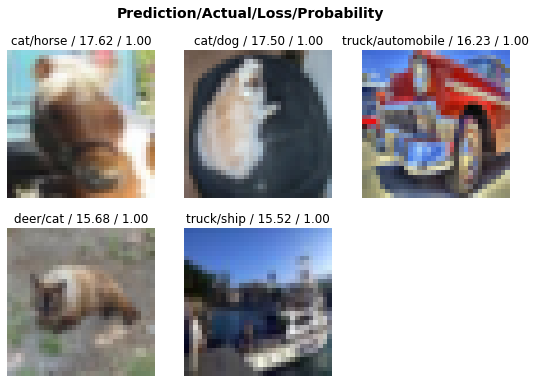

In [ ]:
interp.plot_top_losses(5)

## PETS

画像ファイルから犬か猫かを判別する．

モデル（アーキテキクチャ）は画像ファイルなのでResNetを用いる．

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)
path

Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet')

In [ ]:
path.ls()

(#2) [Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/images'),Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
path_anno = path/"annotations"
path_img = path/"images"

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

(#5) [Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/mikiokubo/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

犬か猫かはファイル名の最初の文字が大文字か小文字かで判別できる． 

ImageDataLoadersクラスのfrom_name_func()メソッドを用いてデータローダーを生成する．

引数は順に，

* データセットのパス path
* ファイル名のリスト files
* ラベル名を判定する関数 label_func
* データ変換（ここでは画像ファイルのサイズの変更） item_tfms

である．

In [ ]:
def label_func(f): return f[0].isupper() #犬猫の判定
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

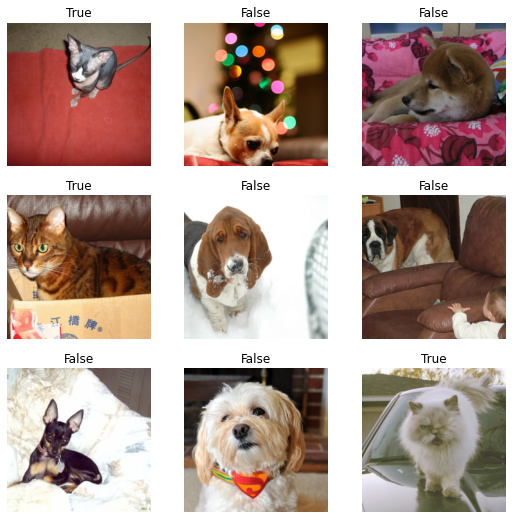

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


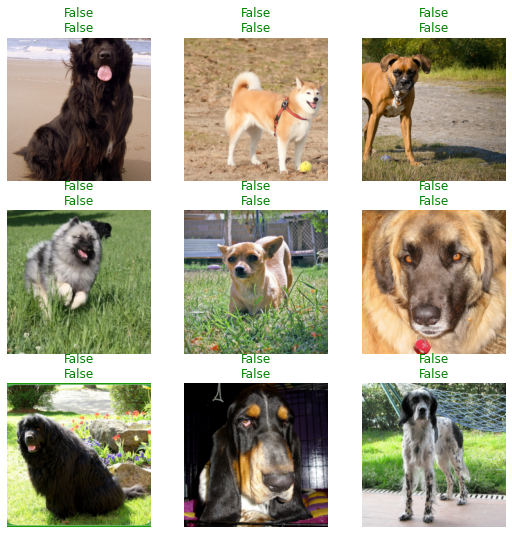

In [ ]:
learn.show_results()

今度は，同じデータセットを用いて，$37$種類のPETの種類を判別する．

データの読み込みには正規表現を用いる．

ImageDataLoaderクラスのfrom_name_re()メソッドは，正規表現を用いてデータを生成する．

引数は順に，

* データセットのパス path
* ファイル名のリスト files
* クラス名をファイル名から抽出するための正規表現 pat 
* データ変換（ここでは画像ファイルのサイズの変更） item_tfms
* aug_transformsによるデータ増大 batch_tfms

である．

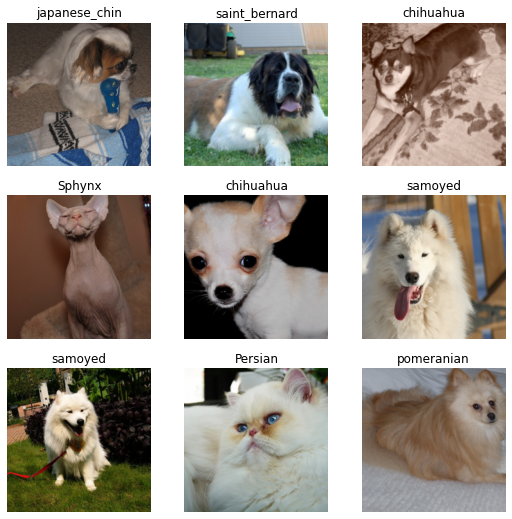

In [ ]:
pat = r"^(.*)_\d+.jpg"
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))
dls.show_batch()

SuggestedLRs(valley=0.0010000000474974513)

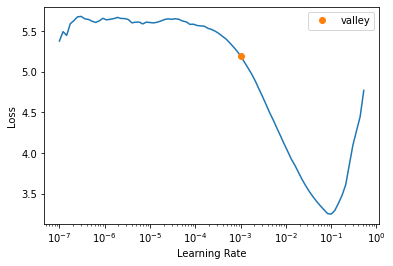

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [ ]:
learn.fine_tune(4, 0.001)

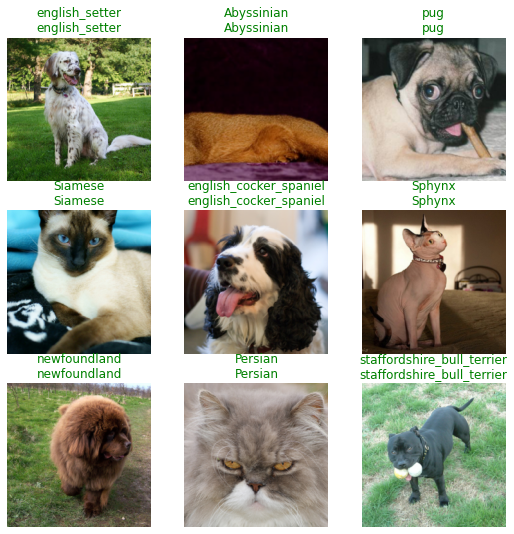

In [ ]:
learn.show_results()

In [ ]:
interp = Interpretation.from_learner(learn)

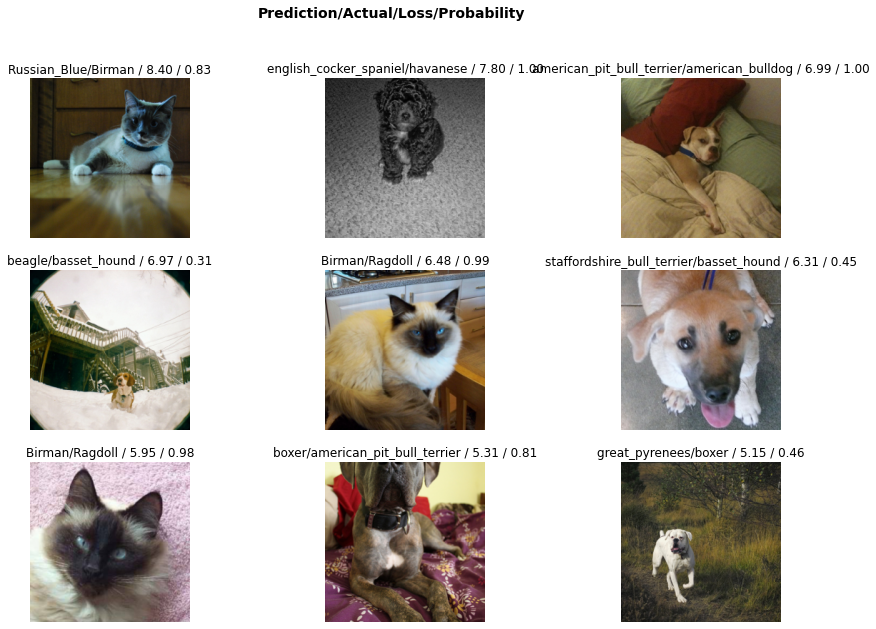

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

## 表形式データ

In [ ]:
from fastai.tabular.all import *

### 例題： サラリーの分類

ADULT_SAMPLEは，小規模な表形式データであり，$50k以上の収入があるかどうかを当てるのが目的だ．

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
path

Path('/Users/mikiokubo/.fastai/data/adult_sample')

In [ ]:
df = pd.read_csv(path / "adult.csv")
df.head().T

0                 1               2  \
age                              49                44              38   
workclass                   Private           Private         Private   
fnlwgt                       101320            236746           96185   
education                Assoc-acdm           Masters         HS-grad   
education-num                  12.0              14.0             NaN   
marital-status   Married-civ-spouse          Divorced        Divorced   
occupation                      NaN   Exec-managerial             NaN   
relationship                   Wife     Not-in-family       Unmarried   
race                          White             White           Black   
sex                          Female              Male          Female   
capital-gain                      0             10520               0   
capital-loss                   1902                 0               0   
hours-per-week                   40                45              32   
native-country        United-States     United-States   United-States   
salary                        >=50k             >=50k            <50k   

                                  3                    4  
age                              38                   42  
workclass              Self-emp-inc     Self-emp-not-inc  
fnlwgt                       112847                82297  
education               Prof-school              7th-8th  
education-num                  15.0                  NaN  
marital-status   Married-civ-spouse   Married-civ-spouse  
occupation           Prof-specialty        Other-service  
relationship                Husband                 Wife  
race             Asian-Pac-Islander                Black  
sex                            Male               Female  
capital-gain                      0                    0  
capital-loss                      0                    0  
hours-per-week                   40                   50  
native-country        United-States        United-States  
salary                        >=50k                 <50k

表形式データの基本クラスは TabularDataLoaders であり，これはfrom_csvメソッドやfrom_dfを用いて作ることができる．

from_csvの主な引数の意味は以下の通り．

- csv: csvファイル
- path: ファイルの置き場所
- y_names: 従属変数（ターゲット）の列名（のリスト）
- valid_idx: 検証用データのインデックス
- proc: 前処理の方法を入れたリスト
- cat_names: カテゴリーデータの列名のリスト
- cont_names: 連続量データの列名のリスト


- カテゴリーデータと連続量データを自動的に分けてくれる以下の関数も準備されている．

```
cont_names, cat_names = cont_cat_split(df=データフレーム, dep_var=従属変数の列名)
```

- procs: 前処理の指定

前処理には以下のものがある．

- Categorify: cat_names引数で与えた列リストをカテゴリー変数とする．

- FillMissing： cont_namesに含まれる連続変数に対して欠損値処理を行う．

引数の`FillStrategy`には[MEDIAN, COMMON, CONSTANT]があり，順にメディアン，最頻値，定数（fill_valで指定）である．
また，add_col引数がTrueのときには，欠損値であることを表す列を追加する．

- Normalize: cont_namesに含まれる連続変数の正規化を行う．(平均を引いて標準偏差+微少量で割る．）

時刻型の列を自動的に幾つかの変数に変換する以下の関数が準備されている．

```
add_datepart(df, fldname, drop=True, time=False)
```

fldnameは時刻型が含まれている列名であり，dropがTrueのとき元の列を削除する．またtimeがTrueのときには，日付だけでなく時，分，秒の列も追加する．

In [ ]:
dls = TabularDataLoaders.from_csv(
    path / "adult.csv",
    path=path,
    y_names="salary",
    cat_names=[
        "workclass",
        "education",
        "marital-status",
        "occupation",
        "relationship",
        "race",
    ],
    cont_names=["age", "fnlwgt", "education-num"],
    procs=[Categorify, FillMissing, Normalize],
)

In [ ]:
dls.show_batch()

In [ ]:
cont_names, cat_names = cont_cat_split(df, max_card=50, dep_var="salary")
cat_names

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [ ]:
procs = [FillMissing, Categorify, Normalize]  # 前処理の種類を準備．
valid_idx = range(len(df) - 2000, len(df))  # 検証用データのインデックスを準備．
dep_var = "salary"  # 従属変数名とカテゴリー変数が格納されている列リストを準備．
cat_names = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
cont_names = [
    "age",
    "fnlwgt",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

tabular_learner関数で表形式データの深層学習器を作ることができる．

主な引数の意味は以下の通り．
- dls: データローダー
- layers: レイヤの数を指定したリスト
- emb_szs: カテゴリーデータの列名をキー，埋め込みサイズを値とした辞書
- metrics: 評価尺度(accuracyなど）
- emb_drop: 埋め込みレイヤのdrop out率

In [ ]:
# 深層学習(PyTorch)の学習器インスタンスlearnを生成し，fitメソッドで訓練．引数はエポック数と学習率．
learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3, 1e-3)

summary属性をみると，学習器は，埋め込み層に続いて2つの線形層を配置したニューラルネットになっていることが確認できる．

In [ ]:
learn.summary()

TabularModel (Input shape: 64 x 7)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 6              
Embedding                                 60         True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 136        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 40         True      
____________________________________________________________________________
                     64 x 8              
Embedding                                 128        True      
____________________________________________________________________________
                     64 x 5              
Embedding                                 35         True      
_______________________________________________________________

### 例題：住宅価格の予測

Bostonの住宅価格の予測を深層学習を用いた回帰分析で行う．

medvが住宅の価格で，他のデータ（犯罪率や人口などの数値データ）から予測する．

ただし，訓練データとテストデータのインデックス（**train_idx**,**valid_idx**）を生成するには，
以下に示すように，scikit-learnの**train_test_split**を用いる．

連続データとカテゴリーデータの列は， **cont_cat_split**関数を用いる． 引数の **max_card** $=50$ は $50$以下の種類しかもたない列はカテゴリー変数とみなすことを意味する． また，引数の **dep_var**は従属変数名である．

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
boston = pd.read_csv("http://logopt.com/data/Boston.csv",index_col=0)
procs = [Categorify, FillMissing, Normalize] #前処理の種類を準備．
train_idx, valid_idx = train_test_split(range(len(boston)), test_size=0.3) #検証用データのインデックスを準備．
dep_var = "medv" #従属変数名を準備．

cont_names, cat_names = cont_cat_split(boston, max_card = 50, dep_var=dep_var)
print(cat_names, cont_names)

['chas', 'rad'] ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat']


準備ができたので， **TabularDataLoaders**の**from_df**メソッドでデータローダーを生成し，それをもとに**tabular_learner**関数で学習器 learn を作る．
評価尺度(metrics)には **rmse** （rooted mean square error)を用いる．

fit_one_cycle法を用いて， 30エポック，最大学習率0.001で訓練する．

In [ ]:
dls = TabularDataLoaders.from_df(boston, y_names=dep_var, procs = procs, cont_names=cont_names, cat_names=cat_names)
learn = tabular_learner(dls, metrics=rmse)
learn.fit_one_cycle(30,1e-3)

### 問題（スパム）

メールがスパム（spam；迷惑メイル）か否かを，深層学習を用いて判定せよ．

データは，様々な数値情報から，**is_spam**列が1 （スパム）か，0（スパムでない）かを判定するデータである．

評価尺度はaccuracyとする． 

In [ ]:
spam = pd.read_csv("http://logopt.com/data/spam.csv")
spam.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.21               0.28           0.50           0.0   
1            0.06               0.00           0.71           0.0   
2            0.00               0.00           0.00           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.14            0.28              0.21                0.07   
1           1.23            0.19              0.19                0.12   
2           0.63            0.00              0.31                0.63   
3           0.63            0.00              0.31                0.63   
4           1.85            0.00              0.00                1.85   

   word_freq_order  word_freq_mail   ...     char_freq_;  char_freq_(  \
0             0.00            0.94   ...            0.00        0.132   
1             0.64            0.25   ...            0.01        0.143   
2             0.31            0.63   ...            0.00        0.137   
3             0.31            0.63   ...            0.00        0.135   
4             0.00            0.00   ...            0.00        0.223   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.372        0.180        0.048   
1          0.0        0.276        0.184        0.010   
2          0.0        0.137        0.000        0.000   
3          0.0        0.135        0.000        0.000   
4          0.0        0.000        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       5.114                         101   
1                       9.821                         485   
2                       3.537                          40   
3                       3.537                          40   
4                       3.000                          15   

   capital_run_length_total  is_spam  
0                      1028        1  
1                      2259        1  
2                       191        1  
3                       191        1  
4                        54        1  

[5 rows x 58 columns]

### 問題（毒キノコ）

データから毒キノコか否かを，深層学習を用いて判定せよ．

**target**列がターゲット（従属変数）であり，**edible**が食用，**poisonous**が毒である．

評価尺度はaccuracyとする．

In [ ]:
mashroom = pd.read_csv(
    "http://logopt.com/data/mashroom.csv",
    dtype={"shape": "category", "surface": "category", "color": "category"},
)
mashroom.head()

target   shape surface   color
0     edible  convex  smooth  yellow
1     edible    bell  smooth   white
2  poisonous  convex   scaly   white
3     edible  convex  smooth    gray
4     edible  convex   scaly  yellow

### 問題（タイタニック）

titanicデータに対して深層学習を行い，死亡確率の推定を行え．

In [ ]:
titanic = pd.read_csv("http://logopt.com/data/titanic.csv")
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 問題（胸部癌）

http://logopt.com/data/cancer.csv にある胸部癌か否かを判定するデータセットを用いて，深層学習による分類を行え．

最初の列**diagnosis**が癌か否かを表すものであり，"M"が悪性（malignant），"B"が良性（benign）を表す．

In [ ]:
cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...         25.38   
842517                0.07017         0.1812  ...         24.99   
84300903              0.12790         0.2069  ...         23.57   
84348301              0.10520         0.2597  ...         14.91   
84358402              0.10430         0.1809  ...         22.54   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0            0.1622   
842517            23.41           158.80      1956.0            0.1238   
84300903          25.53           152.50      1709.0            0.1444   
84348301          26.50            98.87       567.7            0.2098   
84358402          16.67           152.20      1575.0            0.1374   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302               0.6656           0.7119                0.2654   
842517               0.1866           0.2416                0.1860   
84300903             0.4245           0.4504                0.2430   
84348301             0.8663           0.6869                0.2575   
84358402             0.2050           0.4000                0.1625   

          symmetry_worst  fractal_dimension_worst  
id                                                 
842302            0.4601                  0.11890  
842517            0.2750                  0.08902  
84300903          0.3613                  0.08758  
84348301          0.6638                  0.17300  
84358402          0.2364                  0.07678  

[5 rows x 31 columns]

### 問題（部屋）

以下の部屋が使われているか否かを判定するデータに対して，深層学習による分類を行え．

**occupancy**列が部屋が使われているか否かを表す情報であり，これを**datetime**列以外の情報から分類せよ．


In [ ]:
occupancy = pd.read_csv("http://logopt.com/data/occupancy.csv")
occupancy.head()

datetime  temperature  relative humidity  light     CO2  \
0  2015-02-04 17:51:00        23.18            27.2720  426.0  721.25   
1  2015-02-04 17:51:59        23.15            27.2675  429.5  714.00   
2  2015-02-04 17:53:00        23.15            27.2450  426.0  713.50   
3  2015-02-04 17:54:00        23.15            27.2000  426.0  708.25   
4  2015-02-04 17:55:00        23.10            27.2000  426.0  704.50   

   humidity  occupancy  
0  0.004793          1  
1  0.004783          1  
2  0.004779          1  
3  0.004772          1  
4  0.004757          1

## 画像データ

データ一覧は Data Externalにある．

http://docs.fast.ai/data.external#download_url

In [ ]:
from fastai.vision import *

### 複数のラベルを生成する分類

PASCAL_2007データを読み込み，複数のラベルの予測を行う．

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PASCAL_2007)

In [ ]:
df = pd.read_csv(path/"train.csv")
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

データブロック DataBlockを始めに生成して，それからデータローダーを作る．

データブロックは，以下の引数をもつ．

* blocks: データブロックを構成するブロックのタプル； 画像ブロックと（複数の）カテゴリーブロック
* splitter: 訓練データと検証データのインデックスを返す関数
* get_x: 独立変数（特徴ベクトル）を返す関数
* get_y: 従属変数（ターゲット）を返す関数
* item_tfms: 個々のデータの変換の指示
* batch_tfms: バッチに対する変換の指示


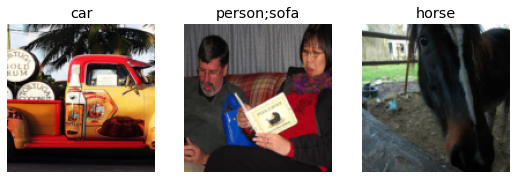

In [ ]:
def get_x(r): return path/"train"/r["fname"]
def get_y(r): return r["labels"].split(" ")
def splitter(df):
    train = df.index[df["is_valid"]].tolist()
    valid = df.index[df["is_valid"]].tolist()
    return train,valid
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)
dls.show_batch(nrows=1, ncols=3)

評価尺度には多ラベル用の正解率 accuracy_multiを用いる．
また，関数partialで，引数の閾値（thresh)を0.2に固定して渡す．
partialは標準モジュールのfunctoolsに含まれているが，fastaiではすでにimportした状態になっている．

fine_tuneで訓練をするが，最終層以外を固定して（freezeして）４エポック訓練し，その後，最終層以外も自由にして3エポック訓練する．

In [ ]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


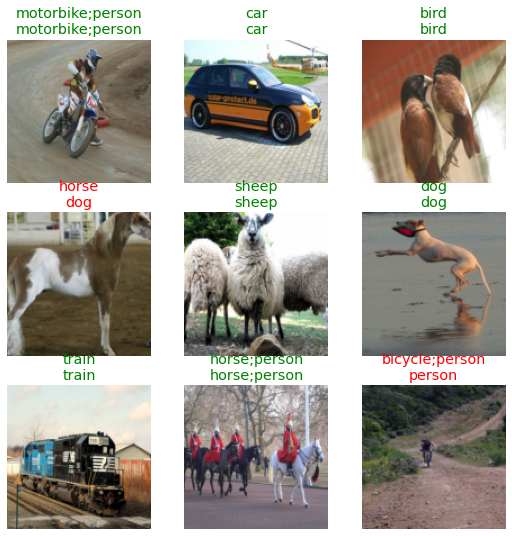

In [ ]:
learn.show_results()

### 画像から人の頭の中心を当てる回帰

画像データは分類だけでなく，回帰を行うこともできる．
BIWIデータを読み込み，サンプル画像を表示する．

In [ ]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [ ]:
img_files = get_image_files(path)
def img2pose(x): return Path(f"{str(x)[:-7]}pose.txt")
img2pose(img_files[0])

Path('/root/.fastai/data/biwi_head_pose/06/frame_00079_pose.txt')

In [ ]:
cal = np.genfromtxt(path/"01"/"rgb.cal", skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [ ]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=="13"),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

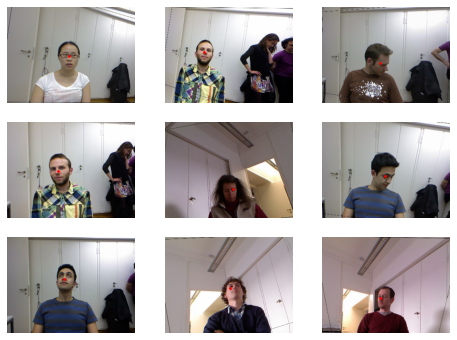

In [ ]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=1.3182567499825382e-06)

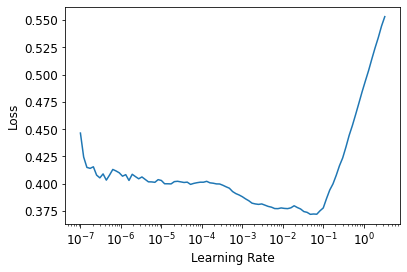

In [ ]:
learn = vision_learner(dls, resnet18, y_range=(-1,1))
learn.lr_find()

In [ ]:
learn.fine_tune(4, 5e-3)

正解と予測を表示

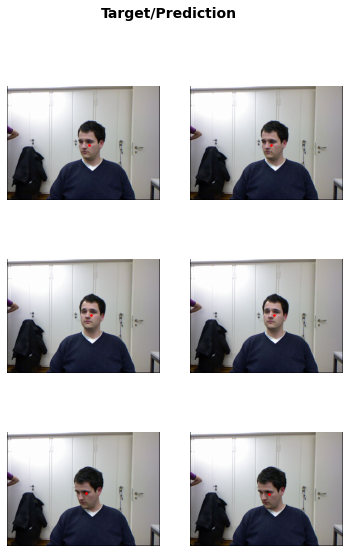

In [ ]:
learn.show_results()

## 協調フィルタリング

In [ ]:
from fastai.tabular.all import *
from fastai.collab import *

協調フィルタリング(collaborative filtering)とは，推奨システム(recommender system)の一種で，ユーザーとアイテムの両方の潜在因子を考慮して，レーティングを決める手法だ．

推奨システムでよく見かけるのは，「この商品を買った人はこの商品も買っています」とか「最も良く売れているのはこの商品です」などの猿でもできるタイプのものだ．このような単純なものではなく，あなたに似た潜在因子をもつ人が，高いレーティングをつけている（もしくは良く購入する）商品に近い潜在因子をもった商品を紹介するのが，協調フィルタリングである．

機械学習の中で（Andrew Ngが実務家から聞いた話だが）実務で最も役に立つ，もしくは期待されているのがこれだ． 背景にある理論を簡単に紹介しよう．

いま，顧客と商品の集合とともに，商品 $i$ に対して顧客 $j$ が評価を行ったデータが与えられているものとする．
ただし，顧客が評価をつけた商品は通常は少なく，データは極めて疎な行列として与えられている．
商品 $i$ に対して顧客 $j$ が評価を行っているとき $1$，それ以外のとき $0$ のパラメータを $r(i,j)$ とする．
$r(i,j)=1$ の場合には，顧客 $j$ は商品 $i$ に対して離散値の（たとえば $1$ から $5$ の整数などで）評価点をつける．
この評価点を表すデータを $y^{(i,j)}$ とする．これがトレーニングデータになる．
これをもとに，評価点がつけられていない（$r(i,j)=0$ の）場所の評価点を推定することが問題の目的となる．


推奨システム設計のための手法は，
**コンテンツベース推奨**(contents based recommendation)と**協調フィルタリング推奨**(collaborative filtering recommendation)の2つに分類できる．

コンテンツベース推奨では，商品 $i$ に対する特徴ベクトル $x^{(i)}  \in R^n$ が与えられていると仮定する．
たとえば，商品を映画としたときに，特徴ベクトルは映画の種別（アクション，SF，ホラー，恋愛もの，スリラー ，ファンタジーなど）の度合いを表す．
たとえば，スターウォーズはSF度 $0.8$，恋愛度 $0.1$，アクション度 $0.1$ と採点される．

顧客 $j$ の特徴に対する重みベクトルを $w^{(j)}  \in R^n$ とする．これは顧客がどういった映画の種別を好むのかを表す．
これを線形回帰を用いて求めることを考えると仮説関数は，
$$
  h_w (x)=w_1 x_1 + w_2 x_2 + \cdots + w_n x_n  
$$
となる．
最適な重みを計算するには，以下に定義される費用関数を最小にする重みベクトル $w^{(j)}$ を求めればよい．
$$
\frac{1}{2} \sum_{i: r(i,j) = 1 } \left(  (w^{(j)})^T (x^{(i)}) -y^{(i,j)} \right)^2
$$

映画ごとに特徴を見積もることは実際には難しい．
そこで，協調フィルタリング推奨では，商品ごとの特徴ベクトル $x^{(i)}  \in R^n$ を定数として与えるのではなく，
変数とみなして顧客ごとの重みと同時に最適化を行う．
すべての顧客と商品に対するトレーニングデータとの誤差の2乗和を最小化する問題は，以下のように書ける．
$$
\min_{w, x} \frac{1}{2} \sum_{(i,j): r(i,j) = 1 } \left(  (w^{(j)})^T (x^{(i)}) -y^{(i,j)} \right)^2
$$

この問題を直接最適化してもよいが，$x$ と $w$ を交互に線形回帰を用いて解く簡便法も考えられる．
すなわち，適当な特徴ベクトルの推定値 $x^{(i)}$ を用いて顧客 $j$ に対する重みベクトル $w^{(j)}$ を求めた後に，
今度は $w^{(j)}$ を用いて $x^{(i)}$ を求めるのである．この操作を収束するまで繰り返せばよい．

上のアルゴリズムを用いて得られた商品 $i$ の特徴ベクトル $x^{(i)}$ を用いると，
類似の商品を抽出することができる．
たとえば，$x^{(i)}$ を $n$次元空間内の点とみなしてクラスタリングを行うことによって，
商品のクラスタリングができる．同様に顧客 $j$ の重みベクトル $w^{(j)}$ を用いることによって顧客のクラスタリングができる．


有名な例題（映画の評価値を当てる）であるMovieLensのデータを読み込む．

データにはtimestamp列がついているが，とりあえずこれは無視してレーティング(rating)を予測してみる．

In [ ]:
path = untar_data(URLs.ML_100k)
ratings = pd.read_csv(path/"u.data", delimiter="\t", header=None,
                      usecols=(0,1,2), names=["user","movie","rating"])
ratings.head()

user  movie  rating
0   196    242       3
1   186    302       3
2    22    377       1
3   244     51       2
4   166    346       1

In [ ]:
movies = pd.read_csv(path/"u.item",  delimiter="|", encoding="latin-1",
                     usecols=(0,1), names=("movie","title"), header=None)
movies.head()

movie              title
0      1   Toy Story (1995)
1      2   GoldenEye (1995)
2      3  Four Rooms (1995)
3      4  Get Shorty (1995)
4      5     Copycat (1995)

In [ ]:
ratings = ratings.merge(movies)
ratings.head()

user  movie  rating         title
0   196    242       3  Kolya (1996)
1    63    242       3  Kolya (1996)
2   226    242       5  Kolya (1996)
3   154    242       3  Kolya (1996)
4   306    242       5  Kolya (1996)

CollabDataLoadersクラスのfrom_dfメソッドにデータフレームを入れるとデータオブジェクトを作成してくれる．

引数はデータフレーム(ratings)，検証データの比率(pct_val)，ユーザー，アイテム，レーティングを表す列名だ．

In [ ]:
dls = CollabDataLoaders.from_df(ratings, item_name="title", bs=64)

作成したデータオブジェクトをcollab_learner関数に入れると学習器（誤差を最小にする潜在因子行列の重みの最適化が目的）を作ってくれる．予測したいレーティングは，星５つまでなので，y_rangeで指定する．

データオブジェクト(data)，潜在因子の数(n_factors)を指定しているが，他にもmetricsは評価尺度，wdはweight decayで正則化のためのパラメータなどを指定できる．

```
def collab_learner(data, n_factors:int=None, use_nn:bool=False, metrics=None,
                  emb_szs:Dict[str,int]=None, wd:float=0.01, **kwargs)->Learner
 ```

In [ ]:
dls.show_batch()

In [ ]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [ ]:
learn.fit_one_cycle(5, 5e-3)

検証の損出関数をみると、過剰適合しているようだ（途中まで下がっているが、最後は上昇している）。

L2正則化関数を入れてみよう。fastaiでは、重み減衰 (weight decay: wd) という引数で指定する。

In [ ]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

訓練ロスは悪化しているが、検証ロスは改善していることが確認できる。

トップ1000の映画を抽出し、埋め込み層の重みを主成分分析で2次元に落として描画してみる。

ニューラルネットが、自動的に映画の特徴を抽出していることが確認できる。

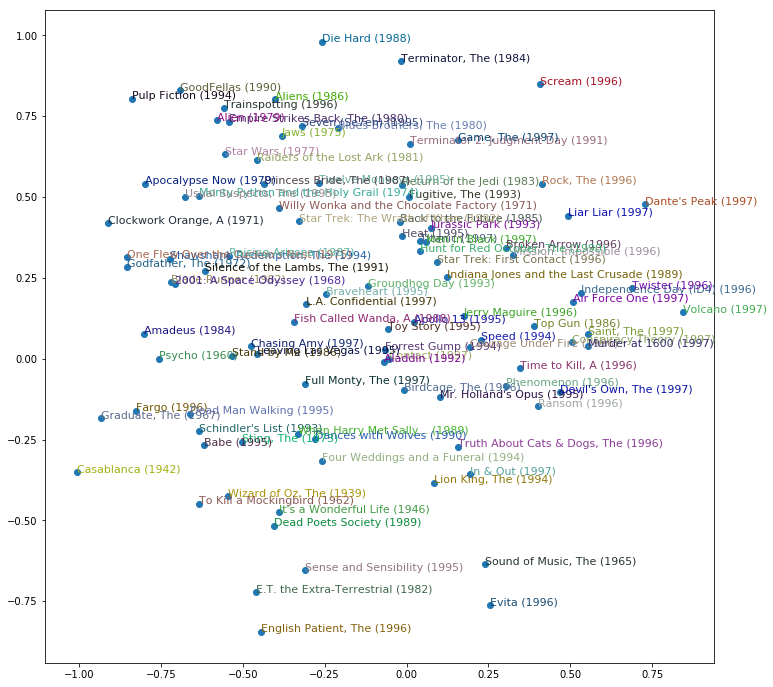

In [ ]:
g = ratings.groupby("title")["rating"].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes["title"].o2i[m] for m in top_movies])
movie_w = learn.model.i_weight.weight[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## 意味分割

以下のデータセットは、与えられた画像の分割（各ピクセルがどの物体に属するのかを分類すること；これを意味分割(semantic segmentation)と呼ぶ）に用いられる。


- Camvid: Motion-based Segmentation and Recognition Dataset (CAMVID, CAMVID_TINY)

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/"labels"/f"{o.stem}_P{o.suffix}",
    codes = np.loadtxt(path/"codes.txt", dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

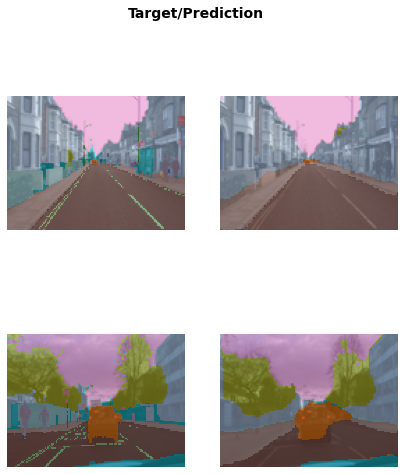

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

## テキストデータ

fastaiでは，Wikipediaの膨大なテキストデータを用いた学習済みの言語モデルであるAWD_LSTMを準備している． 
映画の批評データを用いて，fastaiの自然言語処理を試してみる．

In [ ]:
from fastai.text.all import *

In [ ]:
path = untar_data(URLs.IMDB)

get_imdb = partial(get_text_files, folders=["train", "test", "unsup"])


dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_imdb, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=128, seq_len=80)

言語モデルのデータブロック dls_lm をもとに，学習済のパラメータAWD_LSTMを読み込んで学習器をつくる．

In [ ]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

適当な文章TEXT を入れて，その後の文章を作らせる．tempertureは文章にランダム性を付与するために用いられる．

In [ ]:
TEXT = "This is a pen. That is an"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]
print(preds)

["This is a pen . That is an allusion to what i ' ve known as The Radio Times . BBC Radio 1 ! is an example of how a different composer can work with an orchestra and which contains over half a",
 'This is a pen . That is an especially unusual phrase for an artist who has been ascribed to the term , and is sometimes referred to as the " Artist Generation " . The term is sometimes defined as defining the evolution of the']

言語モデルを用いて，映画の批評のテキストが，ネガティブかパシティブかを判別する学習器をつくる．

映画批評のデータセットIMDBを読み込んで，言語モデル AWD_LSTM を用いて訓練する．

In [ ]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid="test")
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

予測してみる．

In [ ]:
print( learn.predict("I really liked that movie!") )

('pos', tensor(1), tensor([3.4028e-04, 9.9966e-01]))


## 画像生成

 ちょっと前までは **GAN** (generative adversarial network; 敵対的生成ネットワーク)が流行していたが，
最近では **拡散モデル** (diffusion model)を用いて，高精度な画像を高速に生成することができるようになってきた．

### 問題（DALL・E 2）

DALL・E2  https://openai.com/dall-e-2/ に登録して，オリジナルの画像を生成せよ．

（**注意：** 生成できる画像数に制限がある（毎月リセットされる）

### 問題（Hagging Face Diffusers）

Diffusers https://github.com/huggingface/diffusers/ のQuickstartにある Getting started with Diffusers をGoogle Colab
で開いて，ドライブにコピーを保存してから，最初の画像生成までを実行せよ．

（**注意：** ランタイムでGPUをオンにしてから実行する． 有料版のColab Pro(+)に登録する必要はない）

### 問題 （Hagging Face)

Hagging Face のモデル https://huggingface.co/models のTasks（+22 Taskを押すとたくさん出てくる)から好きなものを選び，試してみよ．
また，どのようなモデルが使われているか解説を読み， （できれば） Google Colabで動かしてみよ．

（**注意：** しばらくはloginなしで使えるが，時間制限を超えるとloginが必要になる）

## 深層学習の基礎を図で解説

通常の（完全結合層から成る）ニューラルネットについては，scikit-learn を用いた機械学習の章で述べた．
以下では，本章で紹介した幾つかのアーキテクチャについて解説する．

### 畳み込みニューラルネット

画像データに対して完全結合層だけのニューラルネットを使うことは，膨大な量のパラメータを必要とするので，適当な選択ではない．
完全結合層のかわりに**畳み込み**(convolusion)を用いた層を用いる方法が，畳み込みニューラルネットである．

畳み込みニューラルネットでは，以下の図に示すように，畳み込み（一種のパラメータ行列の乗算）を行った後に，活性化関数としてLeLUを用い，さらにマックスプールでデータを小さくする操作を繰り返していく．
そして，最後の層だけを完全結合層とし，分類もしくは回帰を行う．

In [ ]:
from IPython.display import Image

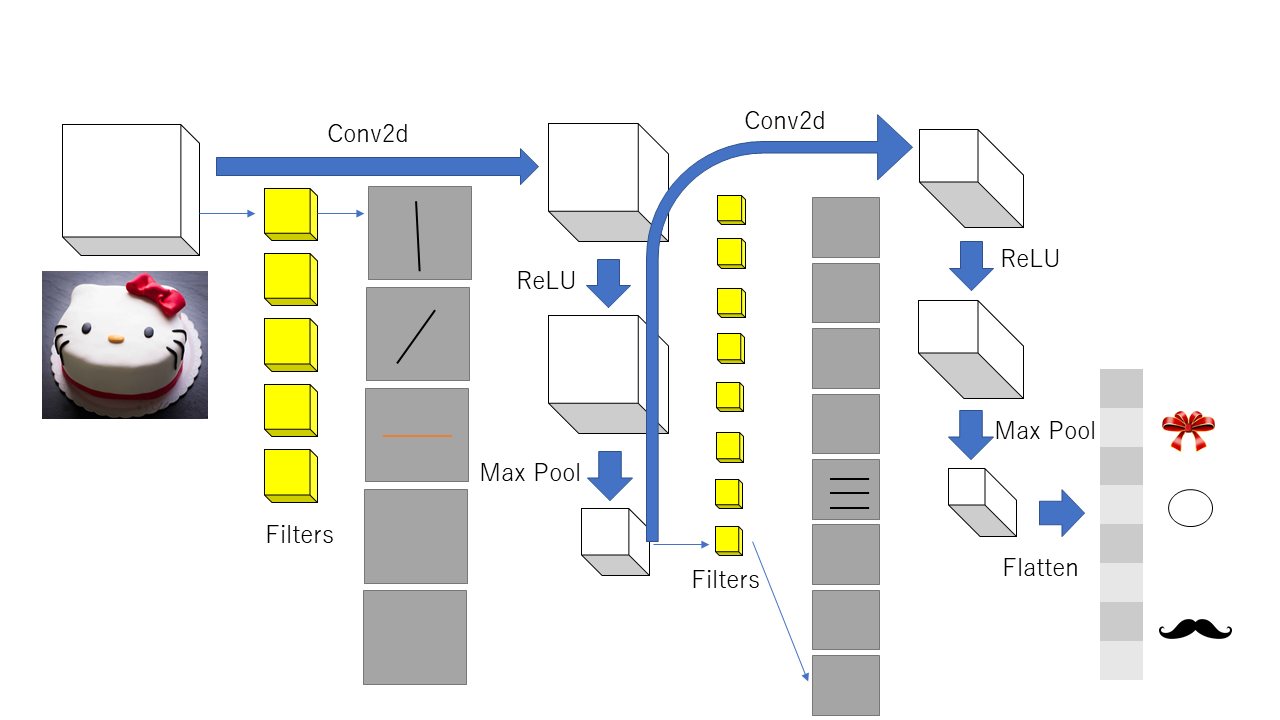

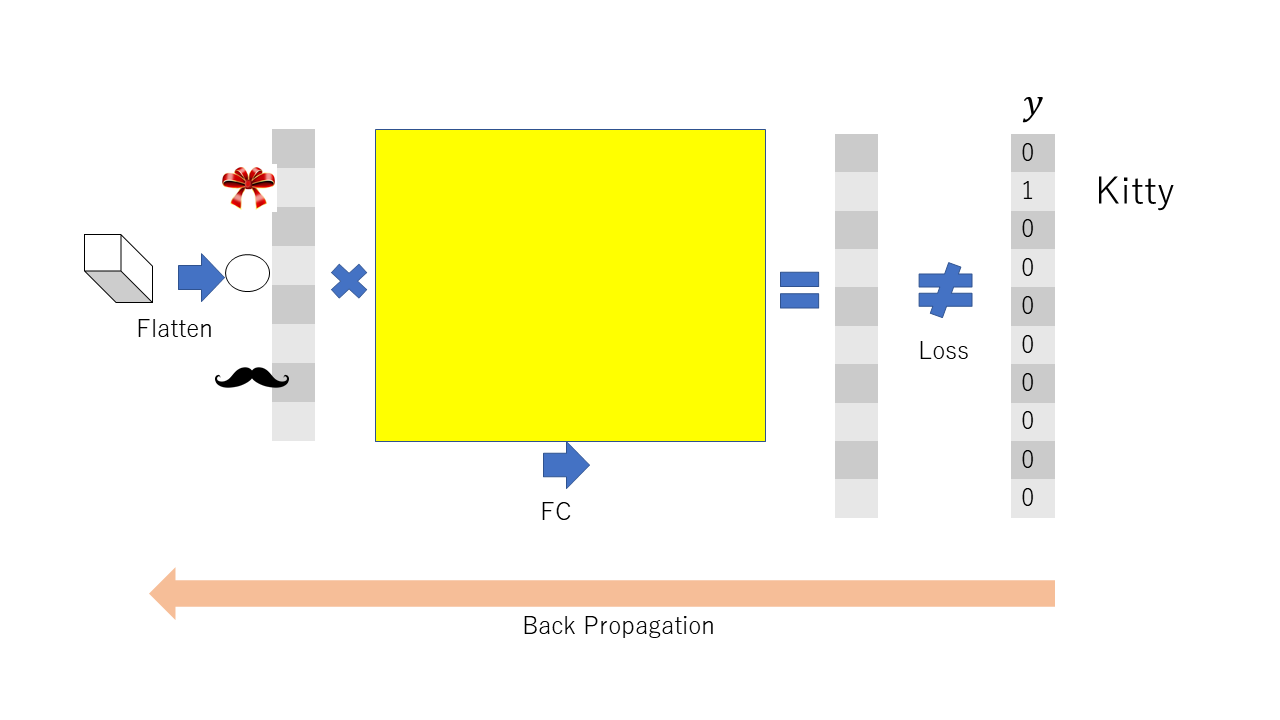

### 回帰型ニューラルネット

文字列や音声などの時系列データを扱うためのニューラルネットとして，**回帰型ニューラルネット**(recurrent neural nettwork)がある．

長さ $T$ の時系列データ $x^{<1>},x^{<2>},\ldots,x^{<T>}$ が与えられたとき，
回帰型ニューラルネットは，初期状態 $a^{<0>}$ から状態の列 $a^{<1>},a^{<2>},\ldots,a^{<T>}$ を順次生成していく．

各時刻 $t=1,2,\ldots,T$ において，データ $x^{<t>}$ と前の状態 $a^{<t-1>}$ を結合したものを入力とし活性化関数（通常は$\tanh$）を用いて，次の状態 $a^{<t>}$ を生成していく．

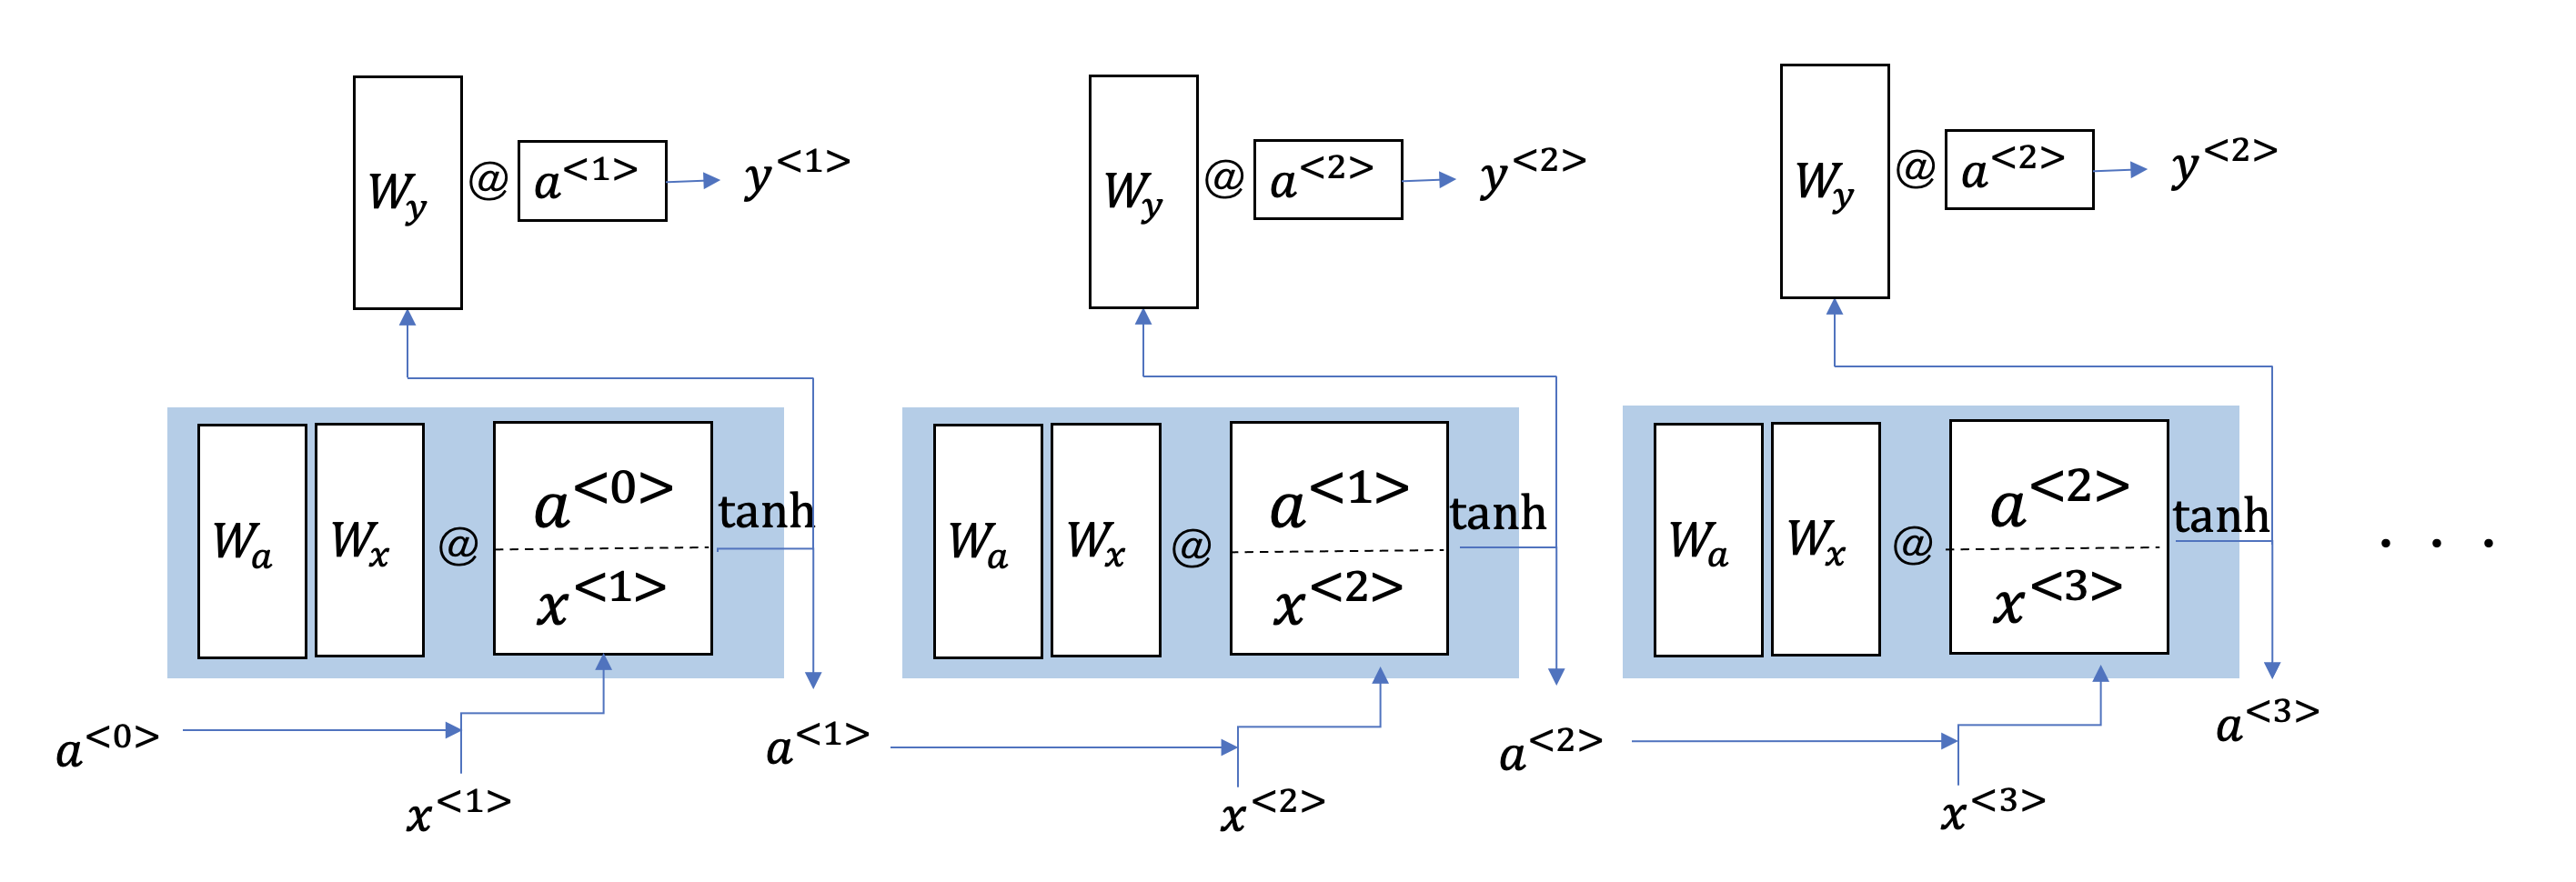

### 長短期記憶

回帰型ニューラルネットは，誤差逆伝播の際に勾配が無限大に発散したり消失してしまうという弱点をもっている．
その弱点を克服するためのアーキテクチャとして，長短期記憶(long short-term memory: LSTM)がある．

LSTMの特徴は，長期の記憶のためのセル(cell) $c^{<t>}$ と，通常の状態（短期記憶に相当する） $a^{<t>}$ の両者を保持することである． 
この2種類の記憶情報を，シグモイド関数 $\sigma$ の出力（$0$ と $1$ の間になる）と乗じることによって， そのまま保持するかリセットするかを決め，
勾配発散（消失）を避けることができる．

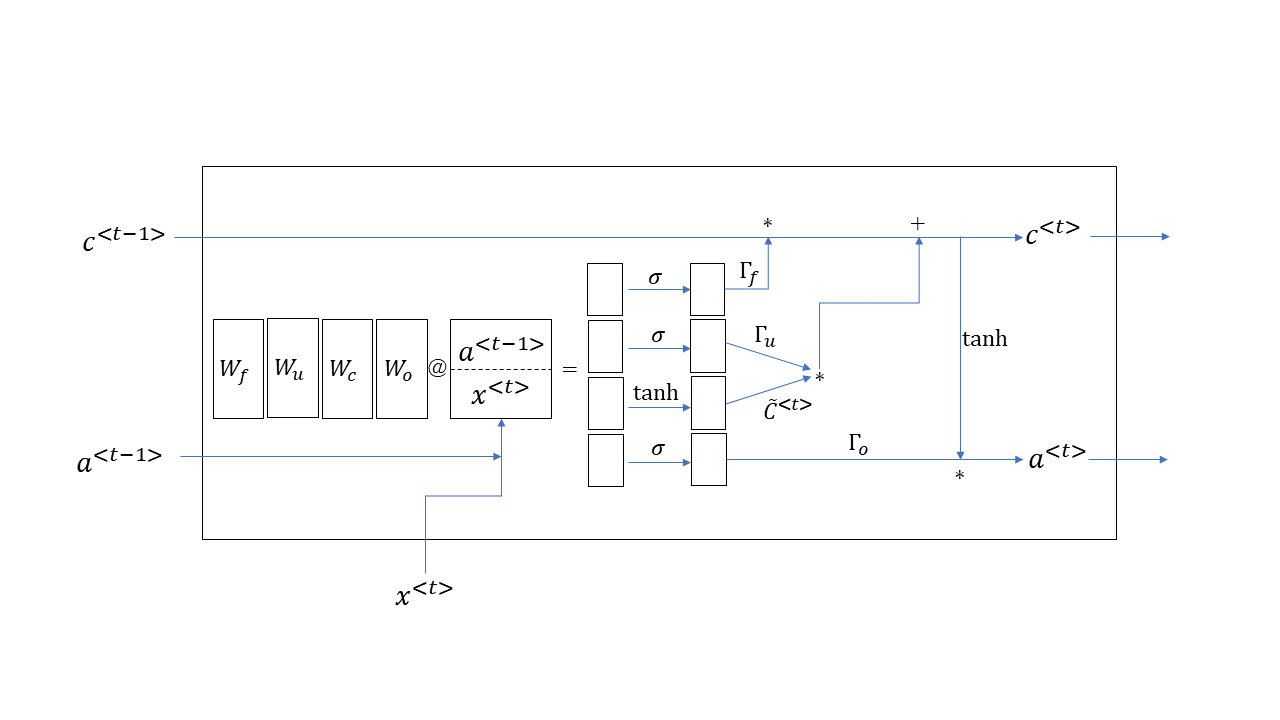

### 埋め込みニューラルネット

カテゴリーデータをより次元の低い特徴に写像するために**埋め込み層**(embedding layer)が使われる．以下の例では，10のカテゴリーをもつデータを，$10\times5$の重み行列を用いて5次元の特徴に埋め込んでいる．

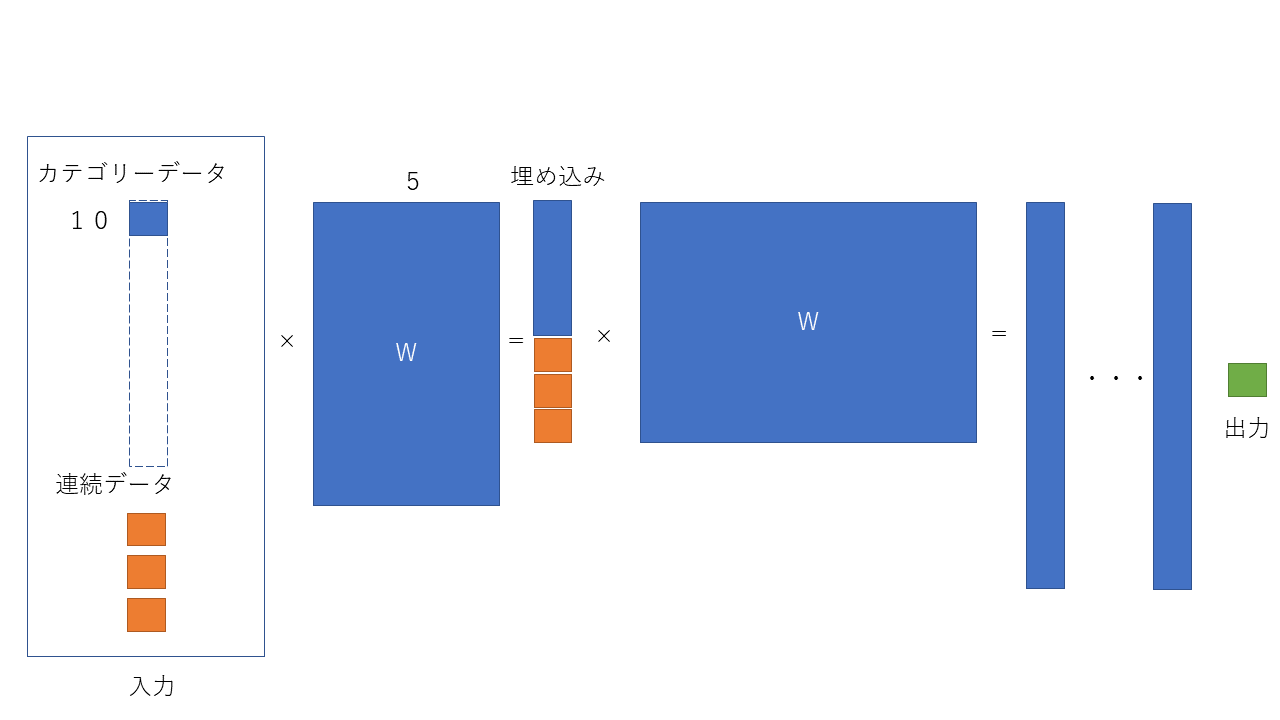

### 自己アテンション

自己アテンション(self attention)は，最近注目を浴びているトランスフォーマーの基礎となるアーキテクチャであり，
自然言語処理に大きな進歩をもたらした．

自己アテンションでは，入力された文章をLSTMのように順番に入力するのではなく，一度に読み込む． 
まず，入力された文字の埋め込みに，文字の位置情報を正弦・余弦曲線を用いて付加し，
それに対してクエリー，キー，値を表す3つの全結合層を適用し，3つの行列（テンソル） $Q,K,V$ を得る．
次に，クエリ行列 $Q$ とキー行列 $K$ の内積をとり，それにスケーリングとソフトマックスを適用することによって，入力された文字同士の関係を表すアテンションを得る．
最後に，アテンションに値行列 $V$ を乗じることによって出力を得る．

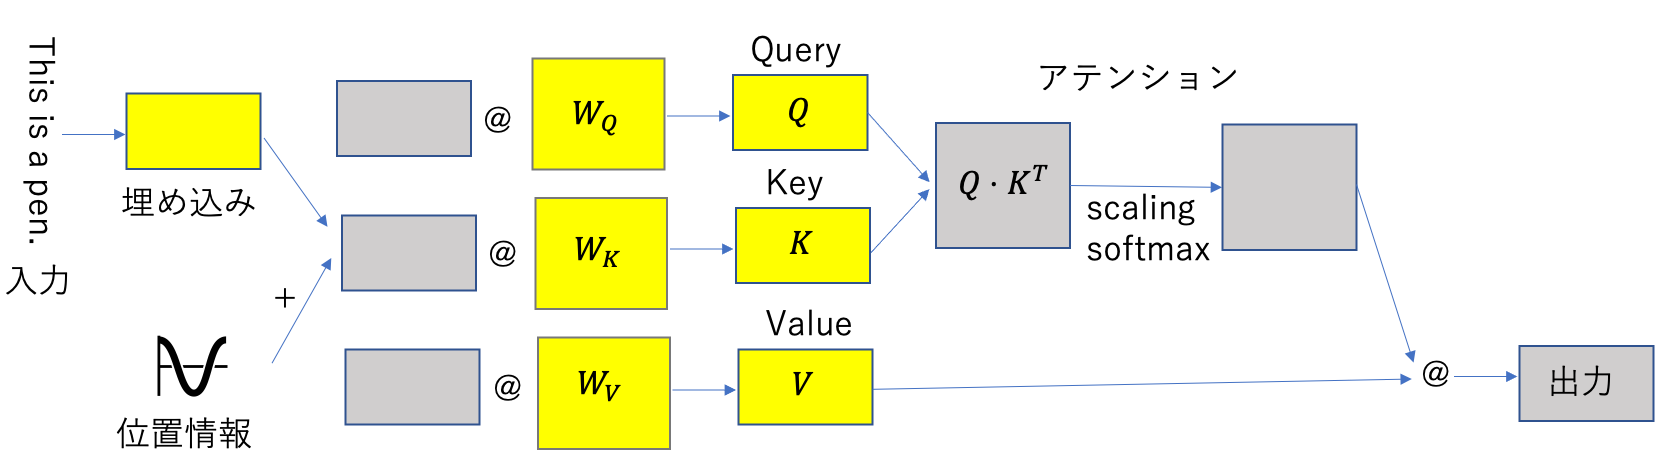

## 実践的な深層学習のレシピと背景にある理論

上では例を示すことによって深層学習の「雰囲気」を学んだが、実際問題を解くためには、プロジェクトの進めるためのコツや、背景にある理論も理解する必要がある。
以下では、それらについて簡単に述べる。

### 訓練、検証、テスト集合

今までの例題では，データセットをトレーニング（訓練）集合とテスト集合の2つに分けていた．
研究や勉強のためには，この2つに分けるだけで十分であるが，
実際問題に適用する際には，訓練集合(training set)，検証集合(validation set)（開発集合(development set)とよばれることもある），テスト集合(test set)の3つにデータを分けて実験を行う必要がある．
訓練集合でパラメータ（重み）をチューニングし，検証集合で実際のデータでうまく動くようにハイパーパラメータをチューニングし，最後にテスト集合で評価する．
テスト集合は実験では使用できないように隠しておく．検証集合は訓練集合から適当な割合で抽出しても良い．

昔は訓練集合は$6$割、検証集合は $2$割、テスト集合は $2$ 割と言われていた。しかし、最近はデータセットが大規模化しており、
検証とテストには一定数のデータセットがあれば十分である。例えば、超大規模データセットに対しては、 $98$%を訓練、検証とテストには残りの$1$%ずつとしても良い。

### バイアスとバリアンス / 過剰適合と不足適合

深層学習の例題（MNISTとかCifarとか）では，現在の世界記録がどのあたりなのかが分かるが，実際問題においてどこまで学習を進めればよいのかは，一般には分からない．より一般的な最適化理論では，適当な緩和問題を用いた限界値（最小化の場合には下界）を得ることができるので，誤差を評価することができる．しかし，深層学習では，それが難しい場合が多い．そのような場合に，人でテストをしてみることによって，可能な誤差を推測することが推奨される．

人間がどんなに頑張っても出ないくらいの誤差（エラー率）をBayes最適誤差(Bayes" optimal error)とよぶ．

```
バイアス  = 訓練誤差 - Bays最適誤差（もしくは人間水準誤差）
バリアンス = 検証誤差 - 訓練誤差
```

バリアンスが大きい状態を**過剰適合**(overfit)とよぶ．バイアスが大きい状態を**過小適合**(underfit)とよび，これは訓練データに対する最適化が十分でないことを表す．
  
まずは訓練集合での正解率を上げることを目標に実験をするのだが，訓練データでの性能がいまいちな状態を「高バイアス」とよぶ．これを改善するには，ネットワークの規模を大きくして学習容量を大きくしたり，訓練時間を長くしたり，最適化の方法を変えたりすることが考えられる．

訓練データでそこそこの成績をあげられたら，今度は検証集合に対して性能を評価する．これがいまいちな状態が「高バリアンス」である．
これを改善するには，データの量を増やしたり，正則化・正規化を行ったりすることが考えられる．これには色々な方法が考えられるが，深層学習で手軽なのはドロップアウトを追加したり，（確率的降下法の場合にはL2ノルムのかけ具合を表す）重み減衰パラメータを大きくしたり，バッチ正規化を行うことである．

### 深層学習のレシピ

深層学習プロジェクトを正しい方向に導くためには，多少のコツがある．ここでは，そのようなコツを伝授する．

検証集合におけるメトリクスが不十分なときに何をすれば良いだろうか？以下のような様々な方法が思いつく．


- より多くのデータを集める．
- より多くの訓練集合を集める．
- 訓練により多くの時間をかける．
- 様々な最適化アルゴリズムを試す．
- より大きなアーキテキクチャにしてみる．
- アーキテキクチャを変更してみる．
- ドロップアウト層を追加してみる．
- L2正則化(regularization；重み減衰(weight decay)と同義語)を追加する． 
- バッチ正規化(batch normalization)を追加する．

しかし，これらを場当たり的に適用しても時間がかかるばかりで，効果は上がらない．重要なのはアーキテクチャの選択とハイパーパラメータ（ニューラルネットでは調整する重みのことをパラメータとよび，それ以外のパラメータをハイパーパラメータとよぶ）の設定である．これには，以下の手順が推奨される．


- 画像の場合には解像度を落とした小さなデータから始めて、徐々に解像度を上げていく。

- 訓練集合に対して損出関数を最小化する．できれば下限（人間の水準）に近づくようにする．これがうまくいかない場合には，学習率を適正な値に設定する。学習率が小さすぎると過少適合になり、大きすぎる最適化の探索が発散する。学習率を適正な値にしても、損出関数の値が想定よりも大きい場合には、より大規模なアーキテキクチャを試すか，異なる最適化手法を試す．バッチ正規化をアーキテクチャに追加し、最適化しやすいアーキテクチャ（残差ネットワークなど）を選択することも忘れてはならない。
メモリや計算速度が十分でないときには、単精度計算をするか、より大きなメモリをもつGPUに変更することを検討する。

- 転移学習を行っている場合には、固定していたパラメータを自由に変更できるようにしてから、再び訓練を行う。

- （上の手順と並行して）検証集合に対して目的とする評価尺度（メトリクス）を達成するように訓練を行う．これがうまくいかない（過剰適合している）場合には，ドロップアウトを追加するか，重み減衰のパラメータを増やすか，訓練集合を増やすか，データ増大を行う．

- テスト集合に対して良い結果が出るように訓練を行う．これがうまくいかない場合には，検証集合を増やすか，データ増大を行う．

- 実問題に対する性能評価を行う．これがうまくいかない場合には，検証集合やテスト集合が実問題を反映しているかどうかを調べ，適宜増やす．

上ではいささか抽象的に手順を紹介したが，具体的なパラメータの適正化は以下の手順が推奨されている．


1. モデル（アーキテキクチャ）を選択する際には，解きたい問題に似た問題のベンチマークでの成績を https://dawn.cs.stanford.edu/benchmark/ やhttps://benchmarks.ai/ で調べて，そこで上位の（かつ簡単な）ものを選択する．たとえば，画像から物体を当てたい場合には，画像によるクラス分けならResNet（メモリに余裕があるならDenseNetやWide ResNet）をベースにしたもの，画像分類（セグメンテーション）ならUNETを選ぶ．

2. ただし競技会で上位のものは大規模なモデルを使用している場合が多い．モデルの規模が増大するにしたがい誤差は小さくなる（精度が上がる）が，その一方で計算時間が増加する．解くべき問題の複雑さを考慮してなるべく小さなモデルから始めて，十分な精度が得られなかったときに，大きめのモデルを試すという方法が推奨される．

3. すでに学習済みの重みがあるモデル（たとえばresnet34）を用い，転移学習を行う場合には，最終層以外の重みを変えないような状態で訓練を行う．学習率をlr_find()で可視化し，損出関数が下降している途中の範囲を求める．

4. 得られた適正な学習率を用いて，最終層だけを数エポック訓練する．損出関数や精度の推移を可視化し，正しく訓練されていることを確認する．

5. 上層も訓練できるように設定し，再びlr_find()で適切な学習率を探索する．

6. 最下層を上で求めた学習率とし，上層の固まりは下層の固まりよりやや（画像の場合には10分の1，テキストの場合には0.26倍）小さめになるように設定し，過剰適合になるまで訓練する．（fastaiでは層のブロックを3層になるようにまとめている．）

7. すぐに過剰適合になっている場合には，それを抑止する方法を取り入れる必要がある．以下の順に試す.

    1. もっとデータを集める．
    2. データ増大を行う．
    3. アーキテクチャ（モデル）にドロップアウト層やバッチ正規化を追加する．
    4. 正則化のためのハイパーパラメータ（重み減衰率: weight decay(wd)）を大きめにする．
    5. アーキテクチャを単純化する．
    
8. 画像データの場合には，上の手順を解像度を下げて行い，徐々に解像度を上げて繰り返す．他の形式のデータの場合には，データの一部を用いて上の手順を行い，適切な結果が出たら大きなデータを入れて本実験を行う．


### L2正則化（重み減衰）が過剰適合を削減する直感的な理由

1. 重み減衰率が大きくなると，重み $w$ は小さくなり，0になるものが増える．それによってニューラルネットがより疎になり，（ドロップアウトと同様に）過剰適合を削減する．

2. tanhなどの非線形な活性化関数を使っている場合，重み減衰率 `lambda` が大きくなると $w$ が小さくなるので，ニューロンへの入力も小さくなる（0に近くなる）．tanhなどの活性化関数を可視化すると分かるように0付近では線形関数に近い形をしている．したがって，非線形な活性化関数も線形関数と同じような働きをするようになり，これによって過剰適合が削減できる．
    

### ハイパーパラメータのチューニング

ハイパーパラメータは、以下の順で重要である。

1. 学習率 (learning rate: lr) 
2. 慣性項（モーメント）(momentum)
3. ミニバッチの大きさ 
4. 隠れ層のユニット数 
5. 層の数 
6. 学習率の減らし方 
7. 正則化パラメータ (weight decay: wd) 
8. 活性化関数 
9. Adamのパラメータ 

#hide
### データセット

fastaiで使用できるデータセットは、https://docs.fast.ai/data.external.html にまとめられている。ここでは、それらのうち重要なものを解説する。

これらのデータセットは、全てAWS(Amazon Web Service)のOpen Dataとして公開されている（https://registry.opendata.aws/）。 
以下では，おおまかな分類ごとに

データセット名（読み込むときの文字列名；SAMPLE, TINYが最後につくものは小規模版）：解説

の形式で示す．

画像分類(image classification)


- MNIST(MNIST, MNIST_SAMPLE, MNIST_TINY, MNIST_VAR_SIZE_TINY)：$28 \times 28$ の手書き文字画像。画像分類で最初に扱われるデータセットである。
- CIFAR10 (CIFAR) : 60000個の $32 \times 32$ のカラー画像であり、10種類の物体に分類する。
- CIFAR100 (CIFAR_100): CIFAR10と同じであるが、100種類の物体に分類する。
- Caltech-UCSD Birds-200-2011(CUB_200_2011)：200種類の鳥の種類を分類する。 物体検出(localization)にも使用できる。
- Caltech 101 (CALTECH_101): 101種類のカテゴリーに分類する。物体検出にも使用できる。  
- Oxford-IIIT Pet (PETS)：27種類のペットを分類する。物体検出にも使用できる。
- Oxford 102 Flowers (FLOWERS): 102種類の花の名前を分類する。画像は解像度が高い。    
- Food-101 (FOOD)：101種類の食べ物を分類する。
- Stanford cars (CARS)：196種類の車を分類する。       


自然言語処理(natural language processing: NLP)


- IMDb Large Movie Review Dataset (IMDB, IMDB_SAMPLE)：映画の批評のテキストファイルを元にした感情分類用(sentiment classification)のデータセット。
- Wikitext-103 (WIKITEXT WIKITEXT_TINY): Wikipediaから抽出された1億個のトークンから構成されるデータセット。言語モデリングで用いられる。
- (AG_NEWS)                
- (AMAZON_REVIEWS)        
- (AMAZON_REVIEWS_POLARITY) 
- (DBPEDIA)                
- (MT_ENG_FRA)            
- (SOGOU_NEWS)             
- (YAHOO_ANSWERS)         
- (YELP_REVIEWS)          
- (YELP_REVIEWS_POLARITY)  


意味分割(semantic segmentation)

以下のデータセットは、与えられた画像の分割（各ピクセルがどの物体に属するのかを分類すること）に用いられる。


- Camvid: Motion-based Segmentation and Recognition Dataset (CAMVID, CAMVID_TINY)
- PASCAL Visual Object Classes (VOC)
- COCO - Common Objects in Context (COCO_SAMPLE, COCO_TINY)
その他（サンプルや講義内で用いるデータ）
- Planet (PLANET_SAMPLE, PLANET_TINY): 衛星画像から複数の説明を当てるデータ 
- Adult (ADULT_SAMPLE): 年収が500Kドル以上かどうかを当てる分類問題用の表形式データ 
- BIWI (BIWI_HEAD_POSE)：頭の中心を当てる回帰分析用のデータ
- Movie Lens (ML_SAMPLE)：協調フィルタリング用の映画の評価値データ
- Human Numbers (HUMAN_NUMBERS): RNN用の数字を英語で書いたデータ
- Bedroom (LSUN_BEDROOMS) : GAN用の寝室画像データ

###  評価尺度（メトリクス）

ここではfastaiで使われる代表的な評価尺度（メトリクス）について解説する．

- 正解率 (accuracy)

入力の中で最大値のクラスが正解クラスと一致している割合．正答率，精度と訳されることもある．
正解が1つのクラスに属しているとき（これを1ラベル問題とよぶ）に用いられる．

例：
入力として3つのクラスから成る5つのデータを与える．正解はすべてクラス1とする．入力の中で値が最大のものは，上のコードの中にあるようにargmaxメソッドで求めることができる．得られた(1,0,1,0,0)が正解(1,1,1,1,1)と一致している割合は 0.4 と計算できる．

```python
    from fastai.metrics import *
    in_ = torch.Tensor([ [0.3,0.5,0.2],
                         [0.6,0.2,0.2],
                         [0.1,0.6,0.3],
                         [0.9,0.0,0.1],
                         [0.8,0.1,0.1],
                        ])
    targs = torch.Tensor([1,1,1,1,1]).long()
    print(in_.argmax(dim=-1).view(5,-1))
    print(accuracy(in_, targs))

>>>
    tensor([[1],
            [0],
            [1],
            [0],
            [0]])
    tensor(0.4000)
```

2値分類の場合には， 正解か否か(true/false)と陽性と予測したか否か(positive/negative)があるので，以下の4通りの場合がある．

- TN : 真陰性 (true negative)
- FP : 偽陽性 (false positive)
- FN : 偽陰性 (false negative)
- TP : 真陽性 (true positive)

正解率は以下のように定義される．

$$
\mathrm{accuracy} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{FN}+\mathrm{FP}+\mathrm{TN}}
$$


- 閾値付き正解率

予測値に対するシグモイド関数の値が，与えた閾値（規定値は0.5）より大きいときに1，それ以外のとき0と計算し，その結果と正解を比較したときの正解率．

例：
ランダムな標準正規分布として与えた5つの予測値に対してシグモイド関数で[0,1]の値に変換し，閾値0.5 より大きいものと正解を比較することによって，閾値付き正解率0.6を得る．

```python
    y_pred = torch.randn(5)
    y_true = torch.Tensor([1,1,1,1,1]).long()
    print("y_pred = ", y_pred)
    print("sigmoid = ", y_pred.sigmoid())
    print(accuracy_thresh(y_pred, y_true))

>>>
    y_pred =  tensor([ 0.8596,  0.3210, -0.1176,  1.0431, -0.7974])
    sigmoid =  tensor([0.7026, 0.5796, 0.4706, 0.7394, 0.3106])
    tensor(0.6000)
```

- トップ $k$ 正解率

入力値が大きいものからk個選択し，それらを正解と比較したときの正解率．

例：
正解率と同じ例題を用いる．トップ2のクラスを出力すると，正解の1は2番目には入っていないので，トップ1の正解率と同じ0.4を得る．

```python
    print(in_.topk(k=2, dim=-1)[1])
    print(top_k_accuracy(in_,targs,k=2))

>>>
    tensor([[1, 0],
            [0, 2],
            [1, 2],
            [0, 2],
            [0, 2]])
    tensor(0.4000)
```

- ダイス係数(dice coefficient)

分割問題で用いられる集合の類似度を表す評価尺度であり，引数 iou (intersection over union) が真のときには，以下のように計算する．

$$DICE(A,B)=\frac{|A \cap B|}{|A|+|B|-|A \cap B| + 1 }$$

引数iouが偽（既定値）のときには，以下のように計算する．

$$DICE(A,B)=\frac{2|A \cap B|}{|A|+|B|}$$

例：

```phython
    print("iou=False:", dice(in_,targs,iou=False))
    print("iou=True:",dice(in_,targs,iou=True))

>>>
    iou=False: tensor(0.5714)
    iou=True: tensor(0.3333)
```

- 誤差率 (error rate)

$1-$正解率であり，上の例題では$1-0.4=0.6$となる．


- 決定係数(coefficient of determination) $R^2$

回帰モデルによって実データをどれくらい説明できているか（回帰分析の精度）を表す指標であり，1に近いほど精度が良いと解釈できる．

$$R^2 = 1 - {\sum_{i=1}^n (y_i - \hat{y}_i)^2 \over \sum_{i=1}^n (y_i-\bar{y})^2 }$$

この定義だと（記号が$R^2$であるにもかかわらず）負になる場合もあるので，注意を要する．最大値は1で誤差が0の状態である．$R^2$が0とは，平均で予測をした場合と同じ精度という意味であり，負の場合は平均値より悪い予測を意味する．

- 平均自乗誤差  (mean squared error) 

誤差の自乗の平均値であり，$i$番目のデータの正解（目標値）を$y_i$，予測値を$\hat{y}_{i}$ としたとき，以下のように定義される． 

$$MSE = \frac{\sum_{i=1}^n (\hat y_i - y_i)^2}{n}$$

これの平方根をとったものがroot_mean_squared_error (RMSE) である． 

$$RMSE =\sqrt{\frac{\sum_{i=1}^n (\hat y_i - y_i)^2}{n}}$$

- 平均絶対誤差 (mean absolute error)

誤差の絶対値の平均値である．

$$MAE = \frac{\sum_{i=1}^n |\hat y_i - y_i|}{n}$$

- 平均自乗対数誤差 (mean squared logarithmic error)

予測値，正解ともに対数をとったもので評価した平均自乗誤差である．

これの平方根をとったものがroot mean squared logarithmic error (RMSLE) である．

- MAPE  平均絶対パーセント誤差 (mean absolute percentage error) 

$$MAPE = \frac{\sum_{i=1}^n | (\hat y_i - y_i)/y_i) |}{n}$$


- 適合率 (precision)：正と予測したデータのうち，実際に正であるものの割合

$$
     \mathrm{precision} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$   

- 再現率 (recall)：実際に正であるもののうち，正であると予測されたものの割合

$$
\mathrm{recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$


- $f$ベータ

適合率と再現率をパラメータ $\beta$ で調整した評価尺度であり，主に2値分類で用いられる．

$$f_\beta = (1 + \beta^2)  \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \mathrm{precision}) + \mathrm{recall}}$$

- 寄与率(explained variance)

「$1 -$誤差の分散/正解の分散」と定義される．



####  自分で新しい評価尺度を作る方法

他の評価尺度から新たに評価尺度を生成するには，標準モジュールのfunctoolsにあるpartialを使うと簡単にできる．fastaiではすでにimportした状態にあるので，以下のように呼び出せば良い．

```python
    acc_02 = partial(accuracy_thresh, thresh=0.2)
    f_05 = partial(fbeta, beta=0.5)
```

最初の行では，閾値付き正解率に対して，閾値を0.2に固定した評価尺度acc_02を生成し，次の行ではfベータ のパラメータ（beta) を0.5に固定した評価尺度f_05を生成している．